In [1]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder

In [2]:
import numpy as np
from base_notebook.pose_data_tools.generate_data import read_xyz
from tqdm import tqdm
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

In [358]:
samples = pd.read_csv('_output/train_process_label.csv')

In [267]:
clf = pd.read_csv('_output/clf.csv')
clf.style.background_gradient(cmap='coolwarm', subset=(clf.index, ['cv0', 'cv1', 'cv2', 'cv3', 'cv4']))

,label,total,mean_length,std_length,min_length,max_length,mean_agents,mean_energy_raw,cv0,cv1,cv2,cv3,cv4
0,0,127,129.45,38.63,69,301,1.00,1933.84,0.27,0.23,0.56,0.28,0.56
1,1,127,152.39,41.04,79,301,1.00,1965.82,0.44,0.44,0.62,0.69,0.40
2,2,127,134.98,37.02,74,301,1.00,1952.79,0.32,0.40,0.31,0.35,0.48
3,3,126,117.18,38.97,46,301,1.00,1759.65,0.36,0.24,0.32,0.38,0.56
4,4,124,134.42,36.31,61,301,1.00,7190.13,0.32,0.36,0.36,0.38,0.48
5,5,126,120.86,39.74,38,301,1.00,2489.49,0.12,0.28,0.24,0.20,0.12
6,6,126,129.44,37.40,56,301,1.00,8258.26,0.64,0.64,0.77,0.56,0.68
7,7,126,121.44,39.34,45,301,1.00,3105.24,0.84,0.85,0.92,0.72,0.80
8,8,127,126.02,36.44,77,301,1.00,2064.36,0.35,0.68,0.56,0.52,0.65
9,9,125,145.74,35.79,89,301,1.00,1964.66,0.52,0.72,0.68,0.32,0.56


# Generate above data

Not required if above stored.

In [244]:
samples

,label,pred,accurate,cv,length,n_agents,energy_raw,energy_proc,filename
0,63,61,0,0,77,1,3.97,3.86e-04,P117S05G10B30H40UC021000LC021000A063R0_1003103...
1,6,46,0,0,149,1,4.55,5.23e-04,P089S02G10B00H10UC072000LC022000A006R0_0920141...
2,18,18,1,0,119,1,6.42,4.26e-04,P088S13G10B00H20UC072000LC031000A018R0_0924133...
3,151,122,0,0,158,1,5749.55,2.46e-03,P051S01G10B00H00UC072000LC021000A151R0_0904172...
4,149,140,0,0,153,1,74.40,5.19e-04,P053S02G10B00H40UC072000LC021000A149R0_0906102...
...,...,...,...,...,...,...,...,...,...
16713,129,129,1,4,171,1,19.58,3.88e-04,P057S02G10B00H20UC022000LC031000A129R0_0907170...
16714,124,122,0,4,176,1,15362.25,1.21e-03,P013S03G10B00H10UC022000LC031000A124R0_0905152...
16715,137,138,0,4,159,1,2117.86,5.47e-04,P057S02G10B00H20UC022000LC031000A137R0_0907170...
16716,82,81,0,4,145,2,1376.56,6.73e-03,P090S00G11B00H00UC032012LC021021A082R0_0920160...


In [41]:
samples = pd.read_csv('_output/train_process_label.csv')
mean_agents = [np.mean(odf['n_agents']) for idx, odf in samples.groupby('label')]
mean_length = [np.mean(odf['length']) for idx, odf in samples.groupby('label')]
min_length = [np.min(odf['length']) for idx, odf in samples.groupby('label')]
max_length = [np.max(odf['length']) for idx, odf in samples.groupby('label')]

In [71]:
np.mean(samples[(samples['energy_raw'] > 1000) & (samples['n_agents'] == 2)])['accurate']

0.29605548331166015

(array([110.,   5.,   3.,   0.,   1.,   1.,   1.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   1.]),
 array([3.02219526e-01, 1.03485805e+03, 2.06941388e+03, 3.10396971e+03,
        4.13852554e+03, 5.17308137e+03, 6.20763720e+03, 7.24219303e+03,
        8.27674886e+03, 9.31130469e+03, 1.03458605e+04, 1.13804164e+04,
        1.24149722e+04, 1.34495280e+04, 1.44840838e+04, 1.55186397e+04,
        1.65531955e+04, 1.75877513e+04, 1.86223072e+04, 1.96568630e+04,
        2.06914188e+04, 2.17259747e+04, 2.27605305e+04, 2.37950863e+04,
        2.48296421e+04, 2.58641980e+04, 2.68987538e+04, 2.79333096e+04,
        2.89678655e+04, 3.00024213e+04, 3.10369771e+04, 3.20715330e+04,
        3.31060888e+04, 3.41406446e+04, 3.51752004e+04, 3.62097563e+04,
        3.

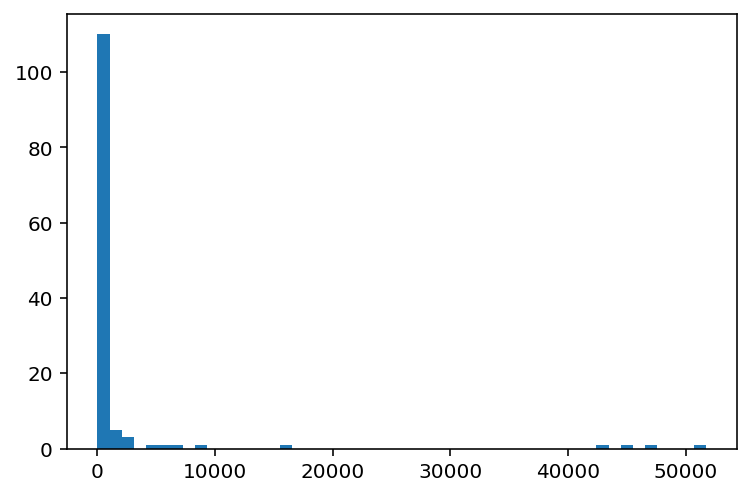

In [63]:
plt.hist(samples[samples['label'] == 0]['energy_raw'], bins=50)

In [56]:
columns = 'label', 'total', 'mean_length', 'std_length', 'min_length', 'max_length', 'mean_agents', 'mean_energy_raw', 'std_energy_raw', 'cv0', 'cv1', 'cv2', 'cv3', 'cv4'

data = []

for label, xdf in df.groupby('label'):
    item = []
    item += [label]
    item += [len(xdf)]
    item += [xdf['length'].mean()]
    item += [xdf['length'].std()]
    item += [xdf['length'].min()]
    item += [xdf['length'].max()]
    item += [xdf['n_agents'].mean()]
    item += [xdf['energy_raw'].mean()]
    item += [xdf['energy_raw'].std()]

    for cv, ydf in xdf.groupby('cv'):
        item += [np.mean(ydf['label'] == ydf['pred'])]
    
    data += [item]
    
clf = pd.DataFrame(data, columns=columns)
clf.sort_values('mean_energy_raw').style.background_gradient(cmap='coolwarm', subset=(clf.index, ['cv0', 'cv1', 'cv2', 'cv3', 'cv4']))

,label,total,mean_length,std_length,min_length,max_length,mean_agents,mean_energy_raw,std_energy_raw,cv0,cv1,cv2,cv3,cv4
67,67,120,134.51,39.38,73,301,1.00,1283.29,5009.56,0.46,0.25,0.25,0.33,0.42
68,68,119,134.50,38.51,67,301,1.00,1423.13,6188.37,0.46,0.43,0.42,0.67,0.54
43,43,120,130.94,41.55,35,301,1.00,1533.65,7263.35,0.33,0.25,0.12,0.42,0.08
108,108,107,127.78,45.82,54,301,1.00,1595.26,6217.51,0.64,0.91,0.81,0.57,0.52
64,64,122,134.30,39.66,73,301,1.00,1624.65,6608.72,0.33,0.33,0.16,0.16,0.33
26,26,126,123.12,38.17,62,301,1.00,1651.72,7869.14,0.48,0.31,0.52,0.16,0.40
109,109,104,129.05,45.48,66,301,1.00,1680.71,6708.51,0.67,0.67,0.70,0.76,0.71
59,59,120,143.17,36.11,81,301,1.00,1704.36,6776.00,0.79,0.71,0.42,0.33,0.54
99,99,110,117.64,42.75,59,301,1.00,1707.99,7330.01,0.55,0.64,0.82,0.18,0.59
3,3,126,117.18,38.97,46,301,1.00,1759.65,7060.34,0.36,0.24,0.32,0.38,0.56


# Interpolation

In [ ]:
idata = np.zeros(data.shape)

for i in tqdm(range(1)):
    length = labels.iloc[i]['length']
    idata[i] = np.apply_along_axis(lambda x: np.interp(np.linspace(0, length, 601), np.arange(length), x[:length]), 1, data[i])

(-6.0, 3.0)

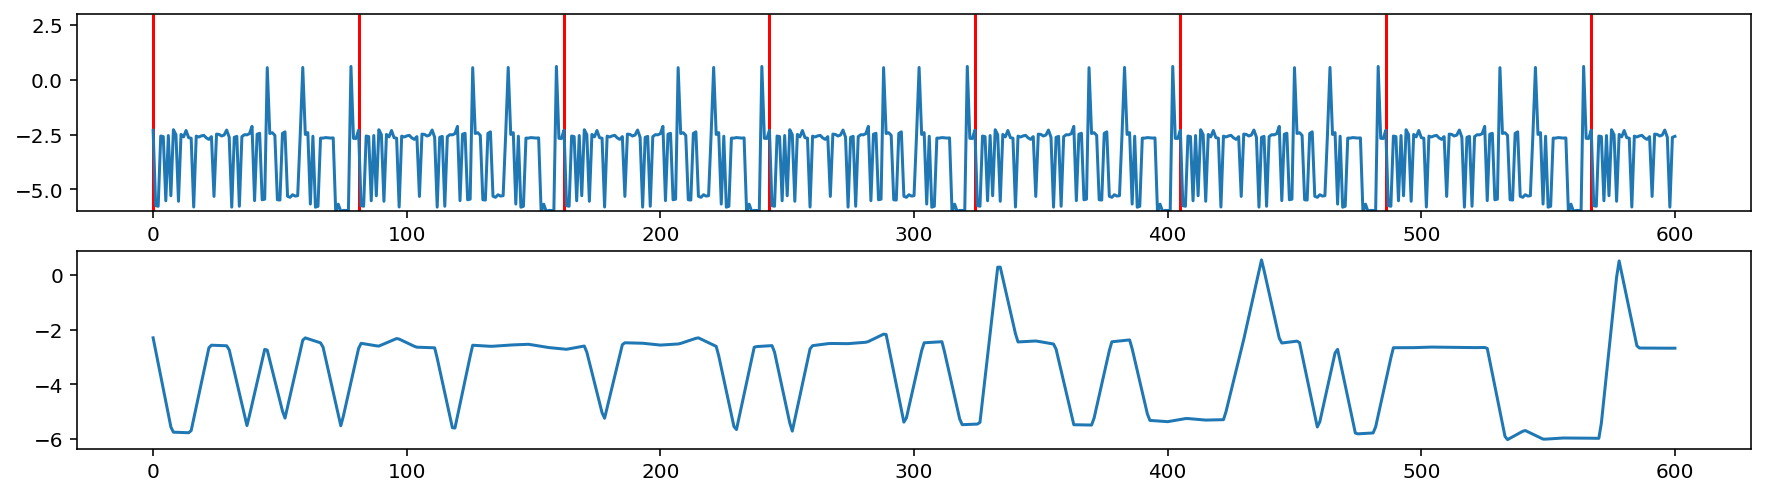

In [208]:
fig, ax = plt.subplots(nrows=2, figsize=(15, 4))
p1 = data[0, 0, :, 0, 0]
p2 = idata[0, 0, :, 0, 0]
ax[0].plot(p1)
ax[1].plot(p2)
ax[0].eventplot(81 * np.arange(8), color='r', lineoffsets=-2, linelengths=10)
ax[0].set_ylim((-6, 3))

# Confusion matrix

In [30]:
confusion_matrix = np.array([[np.sum(pred == xdf['pred']) for pred in np.arange(155)] for label, xdf in samples.groupby('label')])

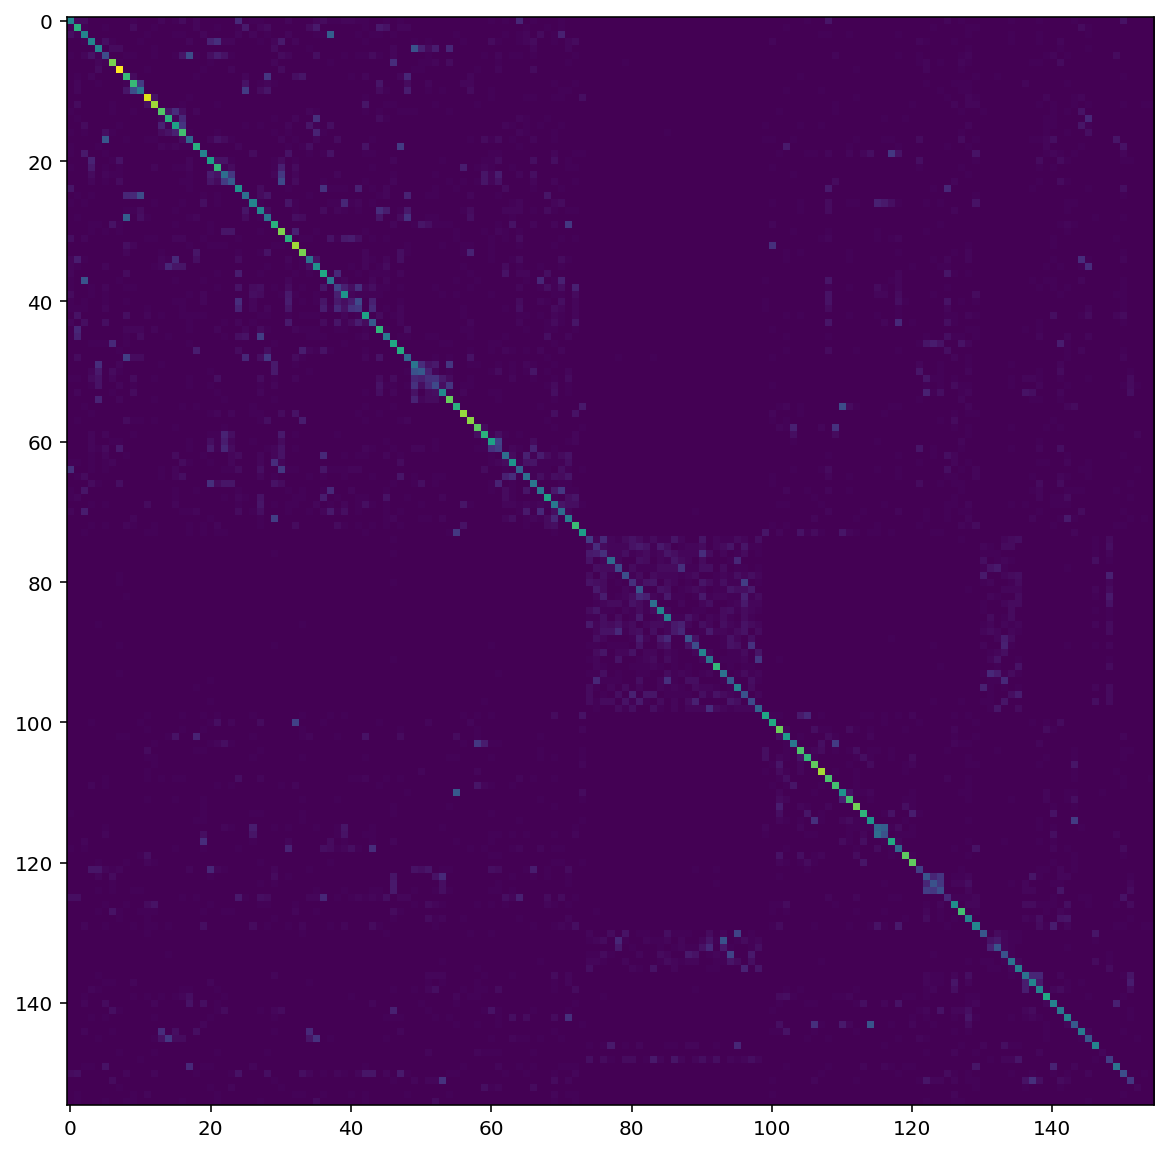

In [245]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(confusion_matrix)

# Energies

In [619]:
%%time
energies = []

for filename in tqdm(labels['filename']):
    sample = read_xyz(f"../iccv2021/_input/train/{filename.split('/')[-1]}", 2, 17)
    energies += [np.mean((sample[:, 1:, :, :] - sample[:, :-1, :, :]) ** 2)]

100%|██████████| 16718/16718 [06:57<00:00, 40.08it/s]

CPU times: user 6min 4s, sys: 13.2 s, total: 6min 17s
Wall time: 6min 57s


# TSNE

## Noise

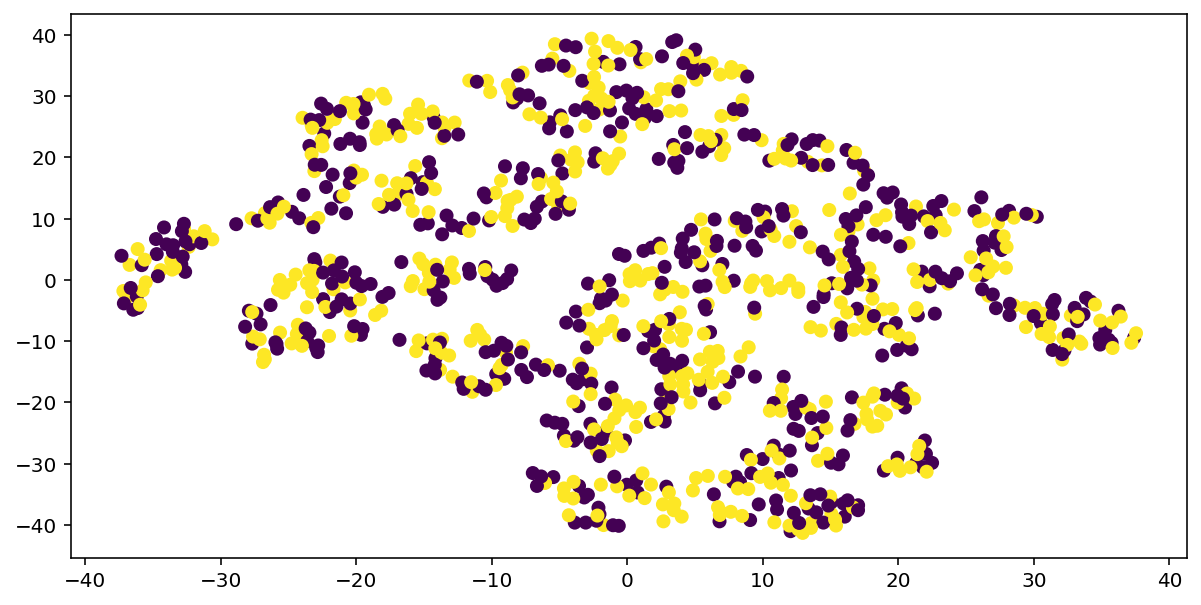

In [145]:
xs = np.random.standard_normal((1000, 3))
ys = np.random.randint(0, 2, 1000)

tsne = TSNE(n_components=2).fit_transform(xs)
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(tsne.T[0], tsne.T[1], c=ys)

## Structured dataset

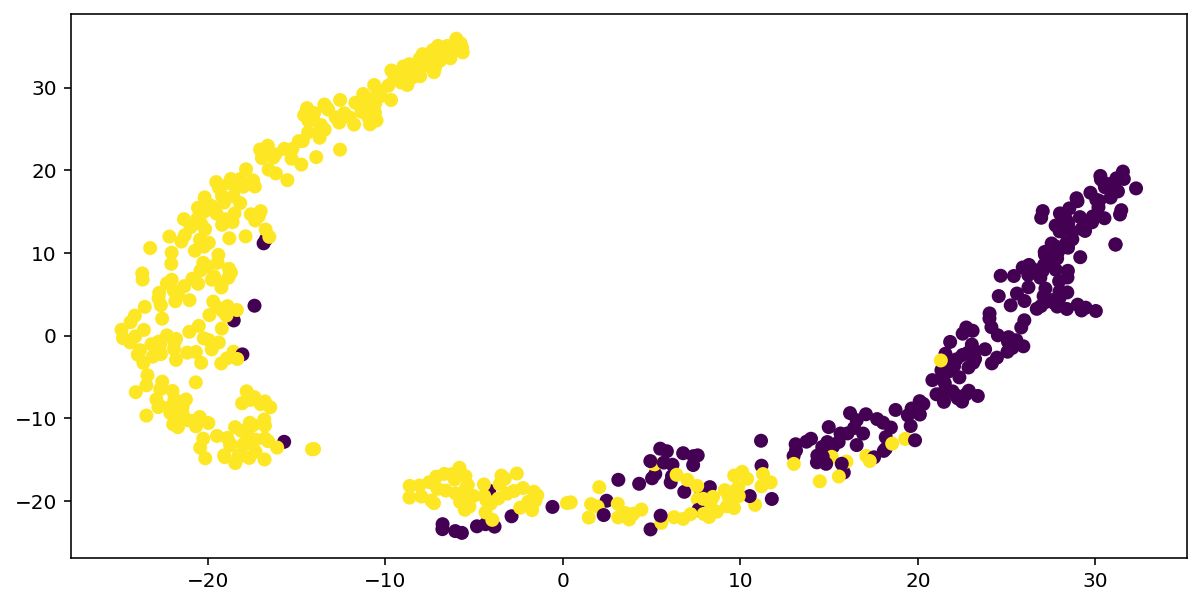

In [130]:
dataset = datasets.load_breast_cancer()

tsne = TSNE(n_components=len(set(dataset.target))).fit_transform(dataset.data)
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(tsne.T[0], tsne.T[1], c=dataset.target)

## Signatures

In [12]:
stats = signatures.reshape((signatures.shape[0], -1))
tsne = TSNE(n_components=len(permitted)).fit_transform(stats)

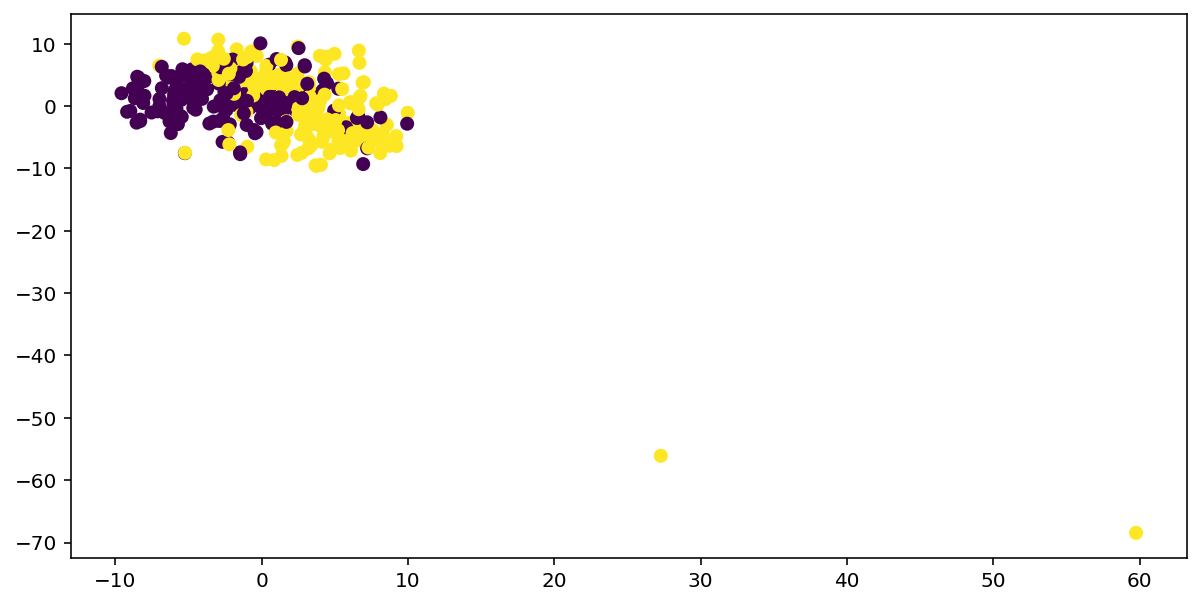

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(tsne.T[0], tsne.T[1], c=labels.loc[idx])

# Plots

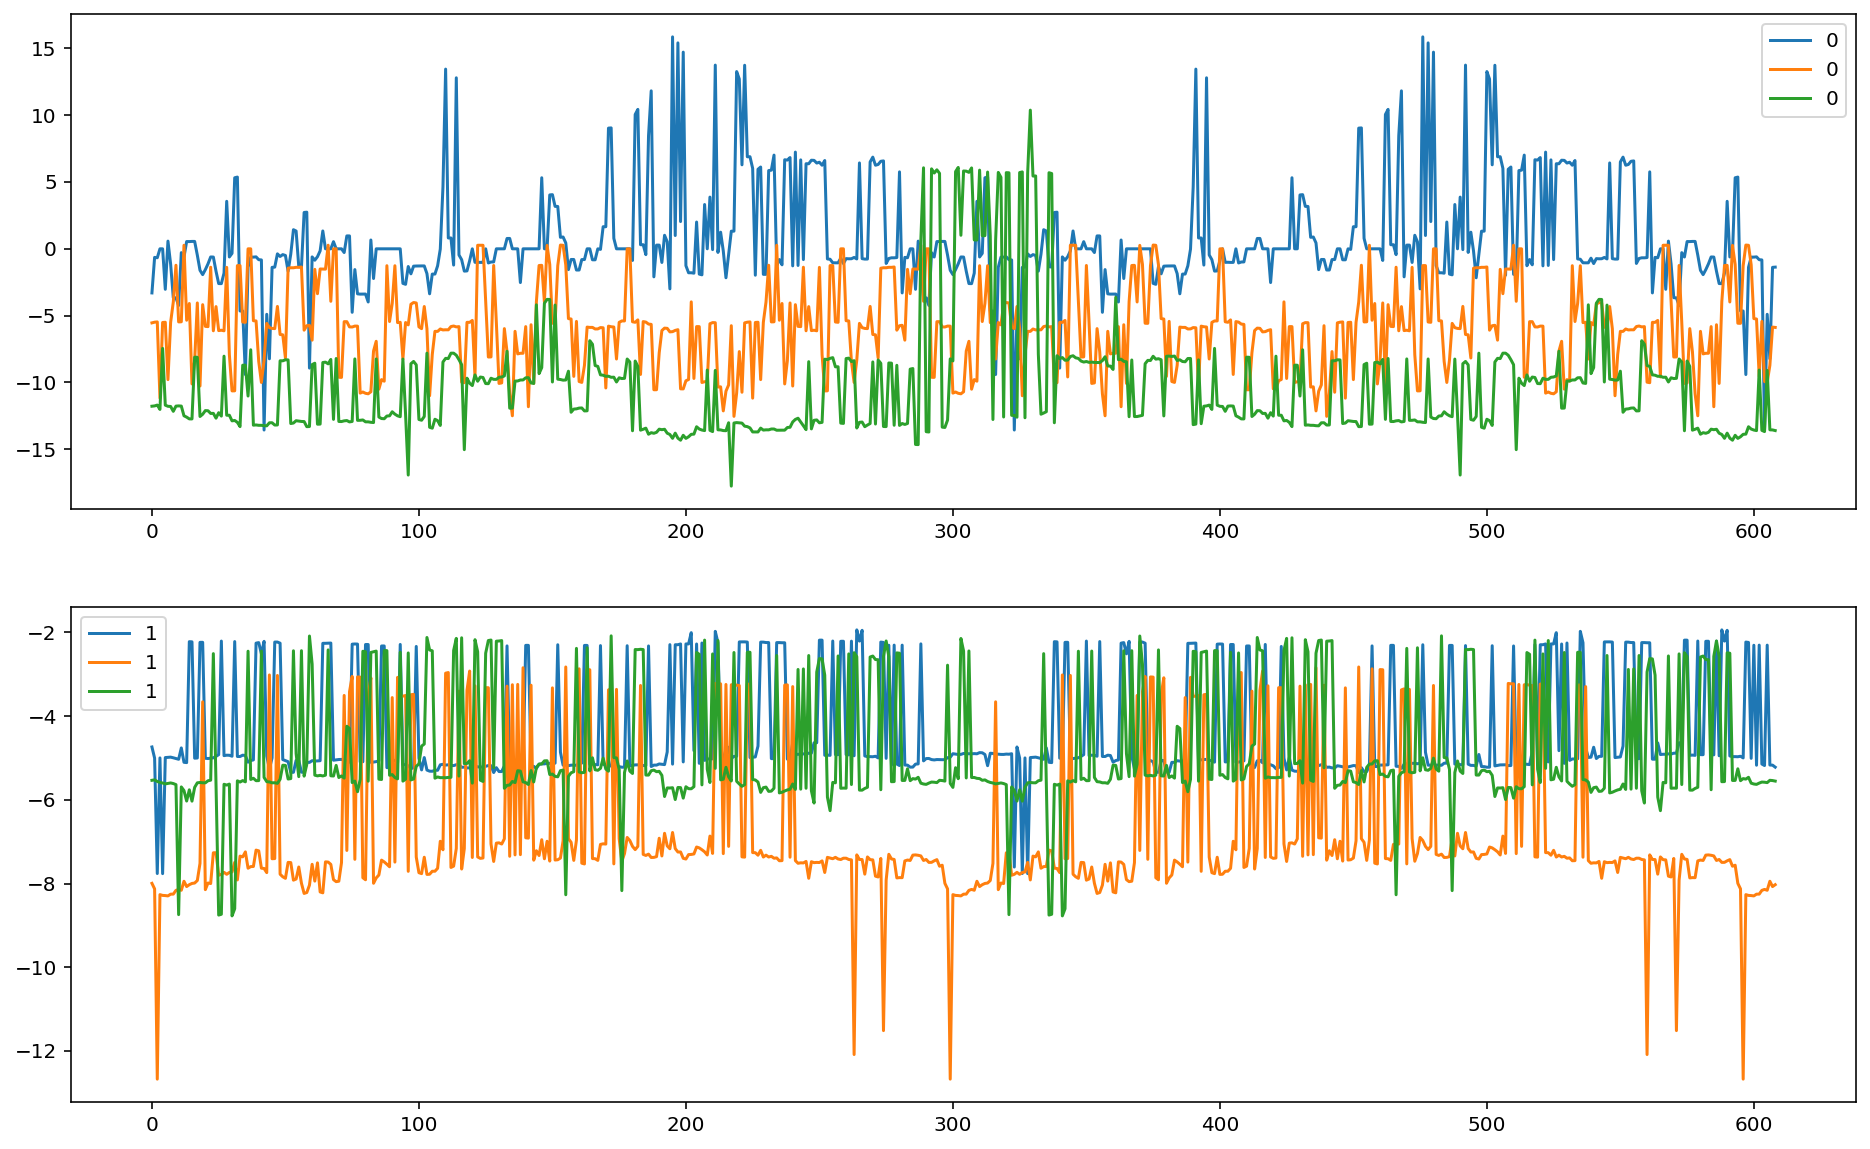

In [133]:
fig, ax = plt.subplots(nrows=2, figsize=(16, 10))

JOINT = 0
SAMPLES = labels.loc[labels[0] == 0].index[:3]

for j in SAMPLES:
    for i in range(1):
        ax[i].plot(data[j, i, :, JOINT, 0], label=int(labels.iloc[j]))
        ax[i].legend()
        
SAMPLES = labels.loc[labels[0] == 1].index[:3]

for j in SAMPLES:
    for i in range(1):
        ax[i+1].plot(data[j, i, :, JOINT, 0], label=int(labels.iloc[j]))
        ax[i+1].legend()

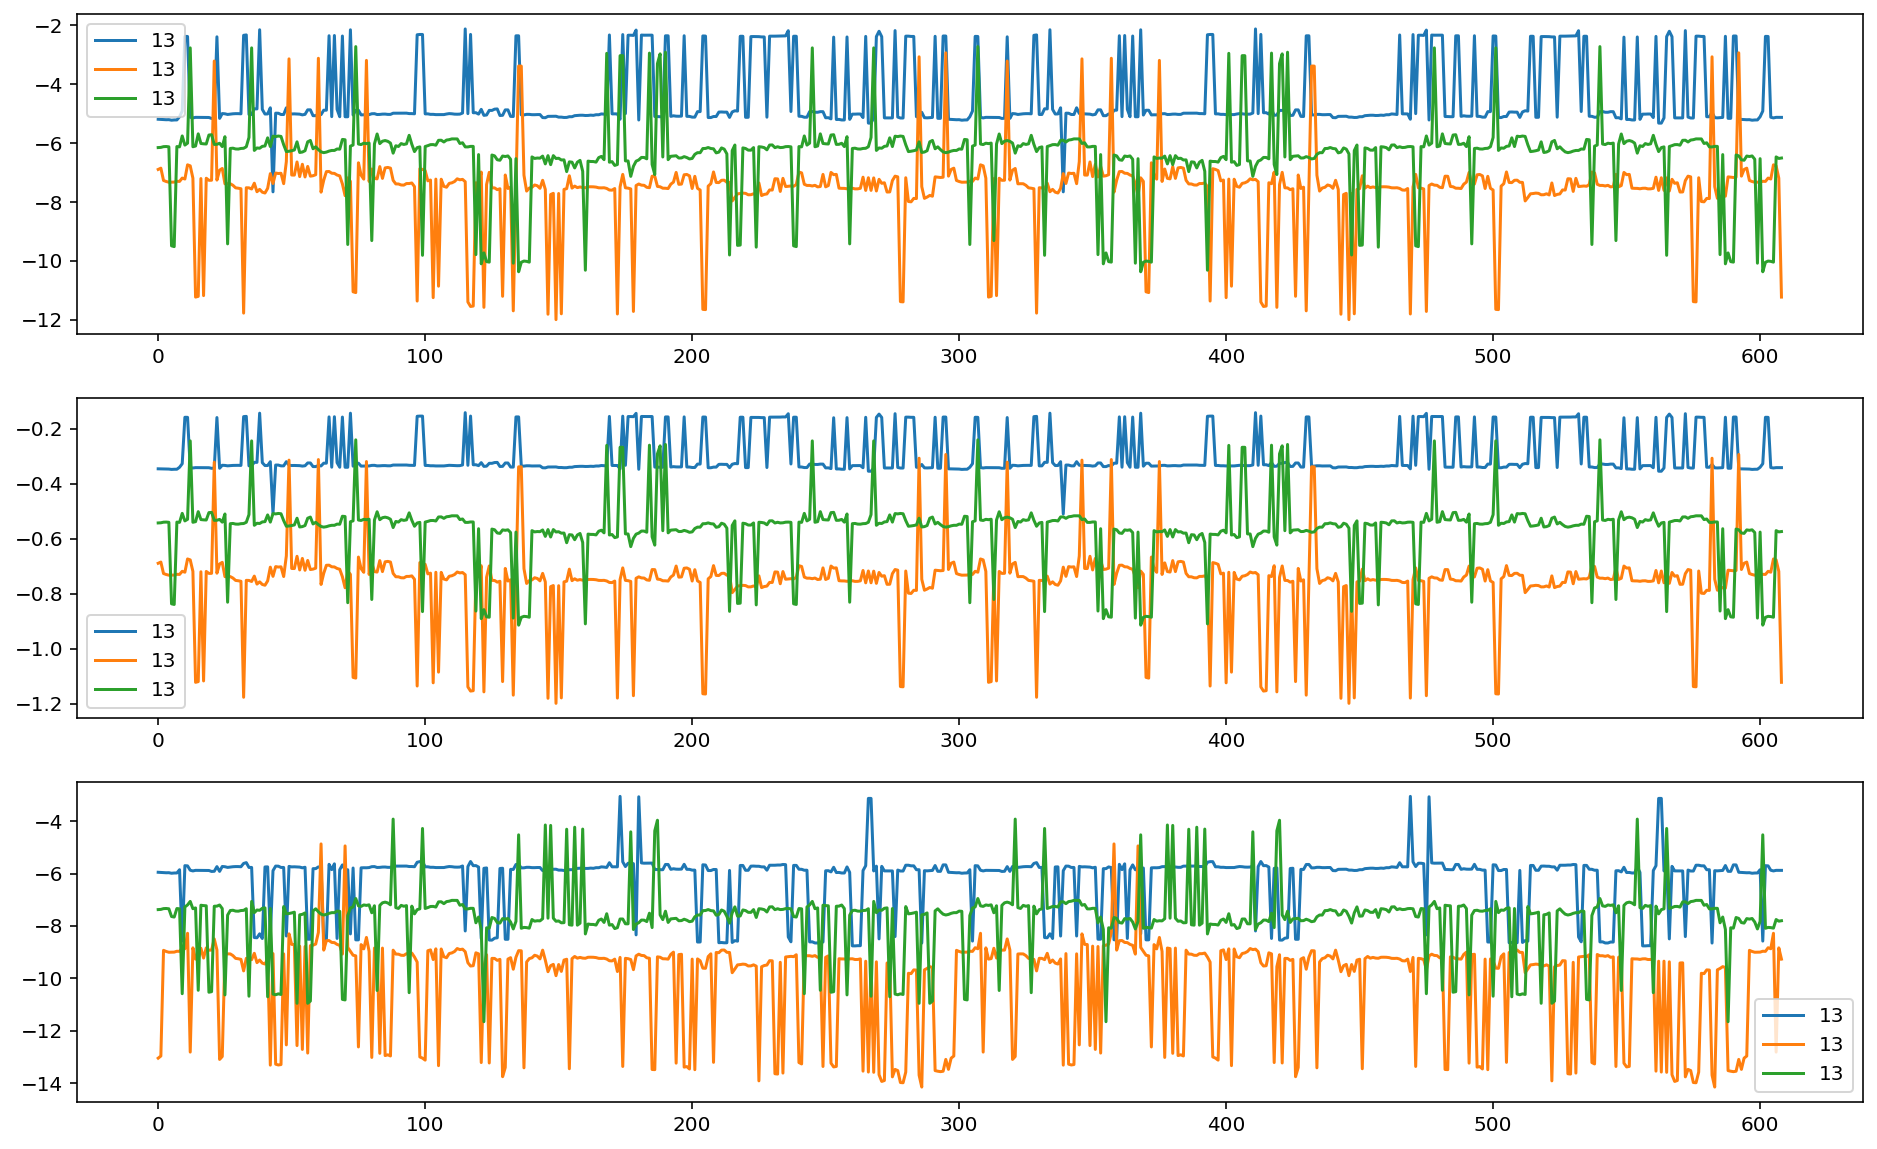

In [129]:
fig, ax = plt.subplots(nrows=3, figsize=(16, 10))

JOINT = 0
SAMPLES = labels.loc[labels[0] == 13].index[:3]

for j in SAMPLES:
    for i in range(3):
        #ax[i].plot(truncated_data[j, :, JOINT, i], label=int(y.iloc[j]))
        ax[i].plot(data[j, i, :, JOINT, 0], label=int(labels.iloc[j]))
        ax[i].legend()

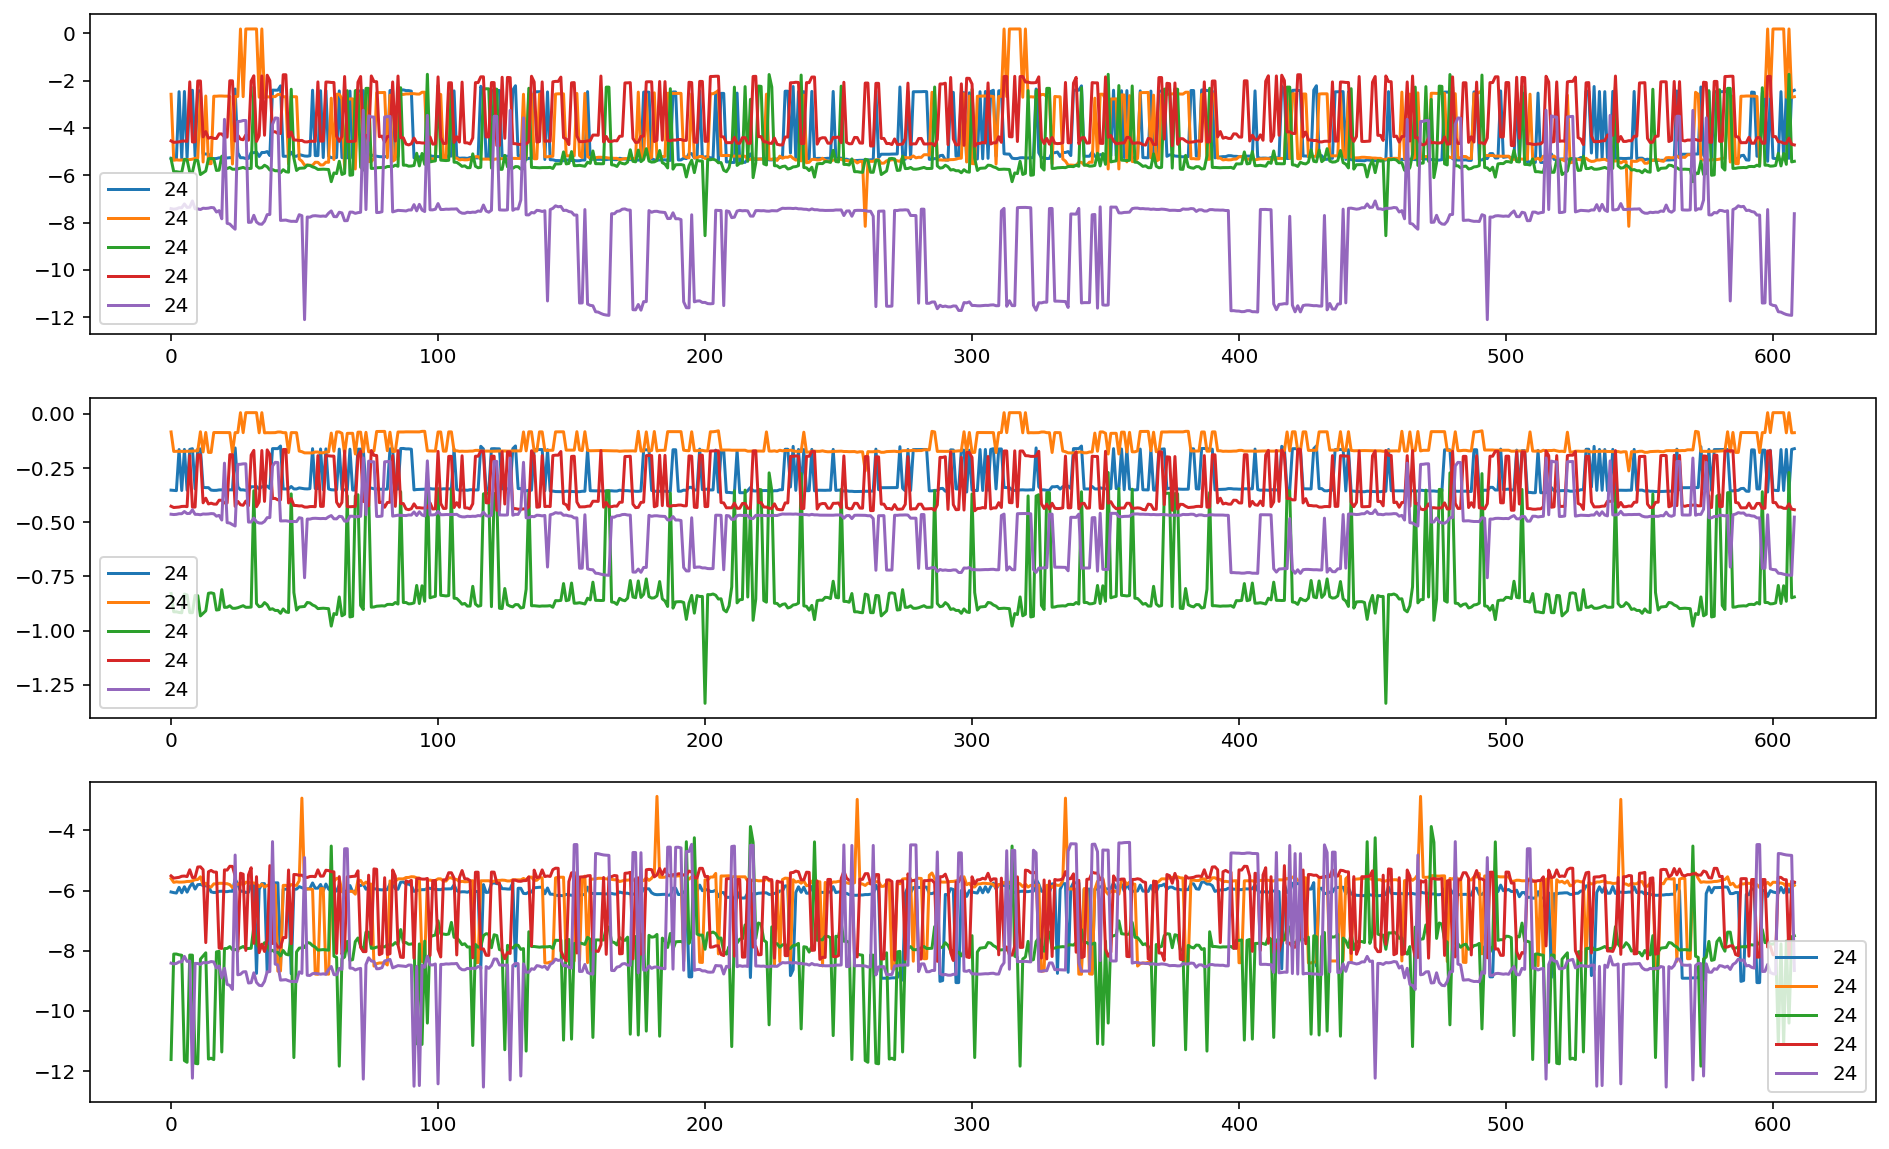

In [137]:
fig, ax = plt.subplots(nrows=3, figsize=(16, 10))

JOINT = 0
SAMPLES = labels.loc[labels[0] == 24].index[:5]

for j in SAMPLES:
    for i in range(3):
        #ax[i].plot(truncated_data[j, :, JOINT, i], label=int(y.iloc[j]))
        ax[i].plot(data[j, i, :, JOINT, 0], label=int(labels.iloc[j]))
        ax[i].legend()